In [1]:
import numpy as np

In [2]:
arr = np.arange(0,6)

In [3]:
x = np.where(arr < 4)

In [4]:
print(x)

(array([0, 1, 2, 3]),)


In [5]:
arr = np.arange(0,12).reshape(3,4)

In [6]:
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [7]:
i,j = np.where(arr < 2)

In [8]:
print(i,j)
# print(zip(i,j))

[0 0] [0 1]


In [9]:
for x,y in zip(i,j):
    print(x,y)

0 0
0 1


In [10]:
import h5py 

In [11]:
import os.path as path

In [12]:
filename = 'data/sim_full_lr20000_s20_e5_v30_ep0.0001_g1.0_w1.0_a4.h5'
filetail = path.split(filename)[1][:-3]
f = h5py.File(filename,'r+')

In [13]:
tbl_theory = f['theory']

In [14]:
tbl_samples = f['samples']

In [15]:
# import simulator
# import generate_spectra

In [16]:
epoch_idx = 1
lamb = f['samples']['wavelength']
flux = f['samples']['flux']
ferr = f['samples']['flux_error']

In [17]:
lamb_theory = f['theory']['wavelength']
flux_stellar = f['theory']['flux_stellar']
flux_tellurics = f['theory']['flux_tellurics']
flux_gas = f['theory']['flux_gas']

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_epoch(epoch_idx,lamb,f,ferr,lamb_theory=None,f_star=None,f_tell=None,f_gas=None):
    plt.figure(figsize=(20,8))
    plt.title('wobble toy data')
    plt.xlabel('$\lambda_{%i}$' % epoch_idx)
    plt.ylabel('$f_{%i}$' % epoch_idx)
    if f_star is not None:
        plt.plot(lamb_theory,f_star[epoch_idx,:],'red',alpha=0.5,label='star')
    if f_tell is not None:
        plt.plot(lamb_theory,f_tell[epoch_idx,:],'blue',alpha=0.5,label='telluric')
    if f_gas is not None:
        plt.plot(lamb_theory,f_gas,'green',alpha=0.5,label='gas cell')
    plt.errorbar(lamb,f[epoch_idx,:],ferr[epoch_idx,:],fmt='.k',elinewidth=0.7,zorder=1,alpha=0.4,ms=6,label='data')
#     plt.legend()

In [20]:
flux_gas.shape

(293706,)

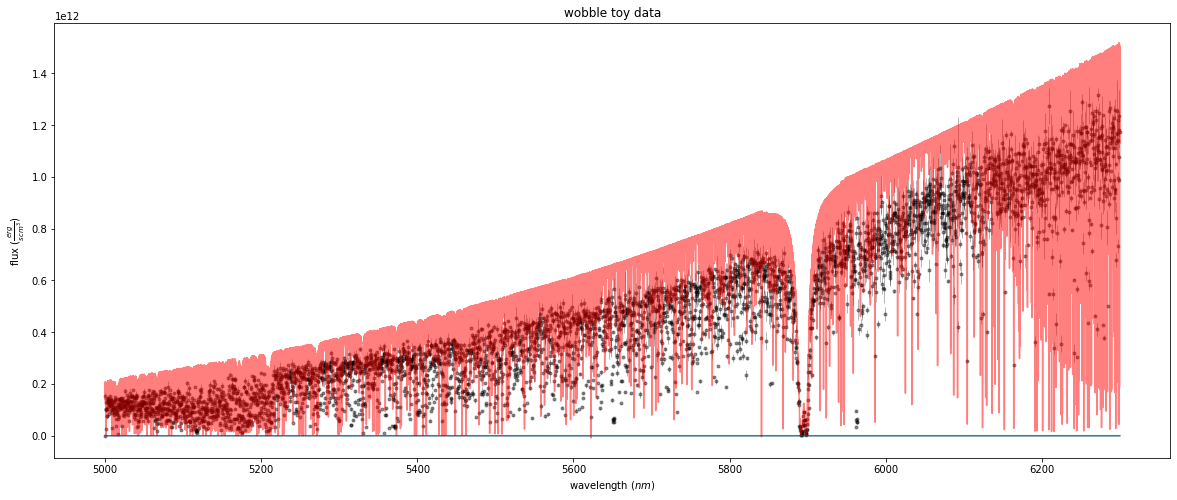

In [21]:
epoch_idx = 0
plot_epoch(epoch_idx,lamb,flux,ferr,lamb_theory,flux_stellar,flux_tellurics,flux_gas)
# plt.ylim(0,4e27)
plt.ylabel('flux ($\\frac{erg}{s cm^3}$)')
plt.xlabel('wavelength ($nm$)')
plt.show()

In [22]:
import dataset as wobble_data

In [23]:
lamb, flux = np.array(lamb), np.array(flux)
lamb_theory, flux_stellar,flux_tellurics, flux_gas = np.array(lamb_theory), np.array(flux_stellar), np.array(flux_tellurics), np.array(flux_gas)

In [24]:
sigma = 80
flux_norm  = wobble_data.normalize_flux(flux,sigma)

x, y, yerr = np.log(lamb), np.log(flux_norm), ferr/flux
flux_stellar_norm = wobble_data.normalize_flux(flux_stellar,sigma)
x_the, y_star, y_tell, y_gas = np.log(lamb_theory), np.log(flux_stellar_norm), np.log(flux_tellurics), np.log(flux_gas)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [25]:
print(max(flux_gas))

1.0254373913703618


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


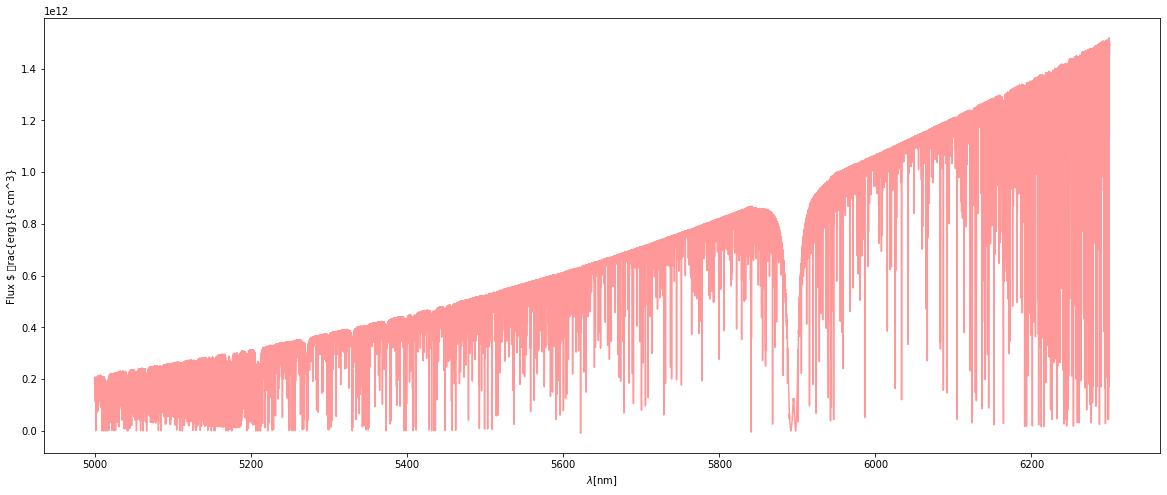

In [56]:
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_stellar[0,:],'-r',alpha=0.4)
plt.ylabel('Flux $ \frac{erg}{s cm^3}')
plt.xlabel('$\lambda$[nm]')
plt.show()

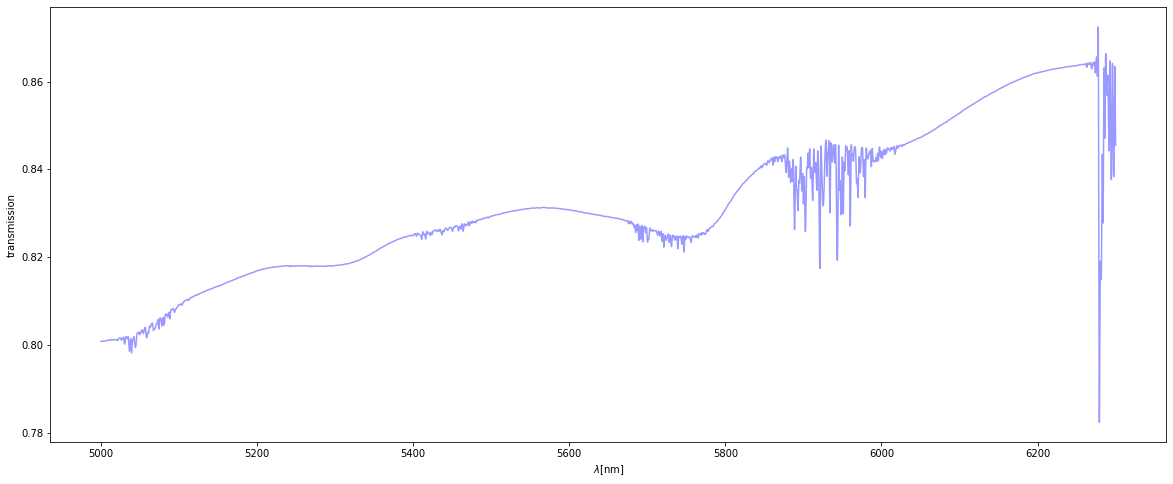

In [48]:
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_tellurics[0,:],'-b',alpha=0.4)
plt.ylabel('transmission')
plt.xlabel('$\lambda$[nm]')
plt.show()

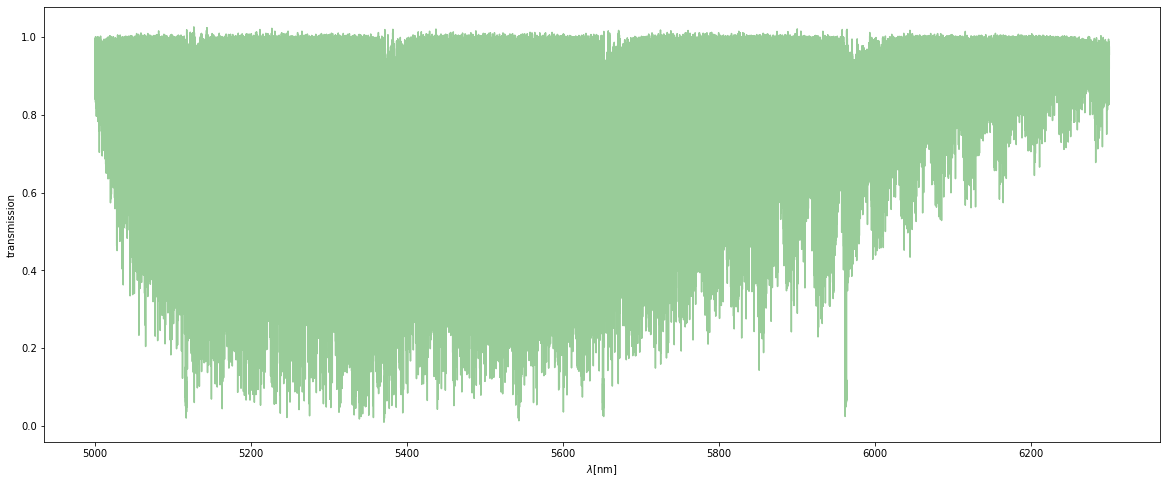

In [55]:
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_gas,'-g',alpha=0.4)
plt.ylabel('transmission')
plt.xlabel('$\lambda$[nm]')
plt.show()

In [29]:
print(x.shape,y.shape,yerr.shape)

(4623,) (5, 4623) (5, 4623)


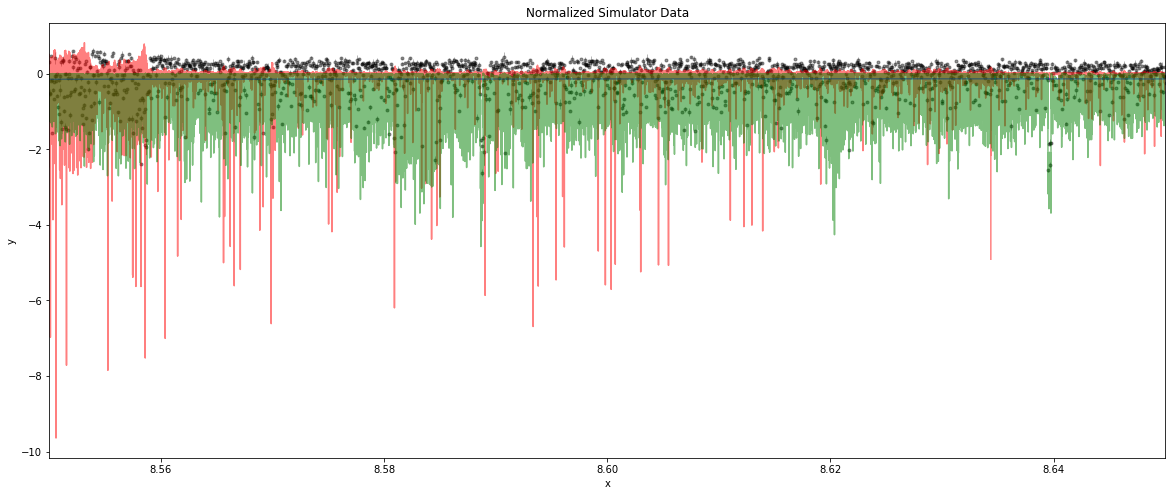

In [30]:
epoch_idx = 2
xmin = 8.55
xmax = 8.65
plot_epoch(epoch_idx,x,y,yerr,x_the,f_star=y_star,f_tell=y_tell,f_gas=y_gas)
# plt.ylim(-10,2)
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(xmin,xmax)
plt.title("Normalized Simulator Data")
# plt.savefig(path.join("out","{}_e{}_xmin{}_xmax{}.png".format(filetail,epoch_idx,xmin,xmax)))
plt.show()

In [31]:
import astropy.units as u

In [32]:
def lanczos_interpolation(x,xs,ys,dx,a=4):
    x0 = xs[0]
    y = np.zeros(x.shape)
    for i,x_value in enumerate(x):
        # which is basically the same as sample=x[j-a+1] to x[j+a]
        # where j in this case is the nearest index xs_j to x_value
#         print("value: ", x_value)
#         print("closest: ",xs[int((x_value-x0)//dx)])
#         print,x_value)
        sample_min,sample_max = max(0,abs(x_value-x0)//dx - a + 1),min(xs.shape[0],abs(x_value-x0)//dx + a)

        samples = np.arange(sample_min,sample_max,dtype=int)
#         print(sample_min,sample_max)
        for sample in samples:
            y[i] += ys[sample] * lanczos_kernel((x_value - xs[sample])/dx,a)
    return y

def lanczos_kernel(x,a):
    if x == 0:
        return 1
    if x > -a and x < a:
        return a*np.sin(np.pi*u.radian*x) * np.sin(np.pi*u.radian*x/a)/(np.pi**2 * x**2)
    return 0


In [33]:
dx = 1.
x_space = np.arange(100,200,step=dx)
y_space = x_space**3 - 3*x_space + 2

In [34]:
x_sampl = np.linspace(120,200)
y_sampl = lanczos_interpolation(x_sampl,x_space,y_space,dx)

In [35]:
y_test = lanczos_interpolation(x_space,x_space,y_space,dx)
print(np.equal(y_test,y_space))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


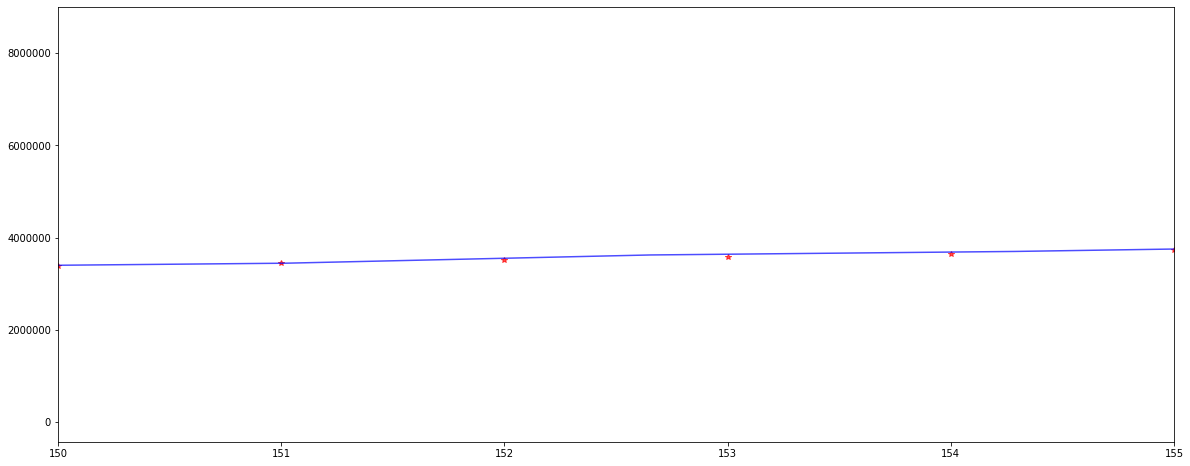

In [36]:
plt.figure(figsize=(20,8))
plt.plot(x_space,y_space,'*r',alpha=0.7)
plt.plot(x_sampl,y_sampl,'-b',alpha=0.7)
plt.xlim(150,155)
plt.show()

In [37]:
def get_difference(arr):
    return [x - y for x,y in zip(arr,arr[1:])]

In [38]:
differences = get_difference(np.log(lamb_theory))

In [39]:
dx = abs(np.mean(differences))

In [40]:
print(dx)

7.868814098088706e-07


In [41]:
nlr = int(1e3)
test_sample = np.linspace(np.log(5400),np.log(5500),nlr)
test_out    = lanczos_interpolation(test_sample,np.log(lamb_theory),flux_gas,dx)

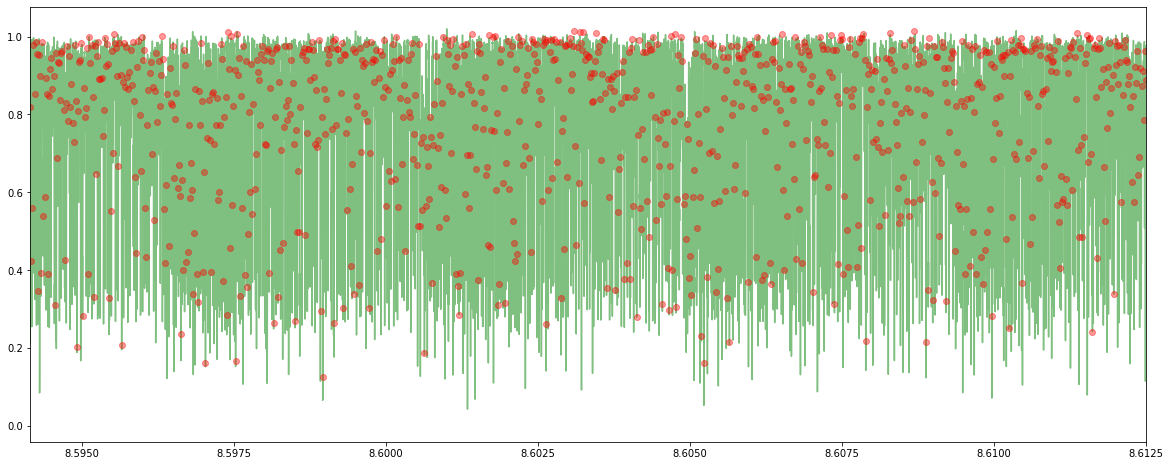

In [42]:
plt.figure(figsize=(20,8))
plt.plot(np.log(lamb_theory),flux_gas,'-g',alpha=0.5)
plt.plot(test_sample,test_out,'or',alpha=0.4)
plt.xlim(np.log(5400),np.log(5500))
plt.show()